In [3]:
from IPython.display import Image

# 1/25 스터디 미션
- 각자 인공지능 모델 하나씩 선정하여, 상세 원리 및 하이퍼파라미터 분석, 노하우 정리하여 발표
- 발표시간 : 5~10분
- 내가 조사할 것 : Random Forest, Decision Tree

## 1. Decision Tree(의사결정 나무)

- 의사결정 나무의 원리
- 주요 인자 및 하이퍼파라미터
    - 주요 인자
        - 지니 불순도
        - 엔트로피
        - 정보 이득
    - 하이퍼파라미터
- 모델 학습
    - 재귀적 분기
    - 가지치기
- 사용 방법
- 한계

### - 의사결정 나무의 원리
- 스무고개와 같이 새로운 데이터가 들어오면 체크리스트를 바탕으로 하나씩 질문을 하며 거기에 나온 답에 대한 다음 줄기를 따라 가며 최종적으로 어떤 레이블인지 분류하는 알고리즘

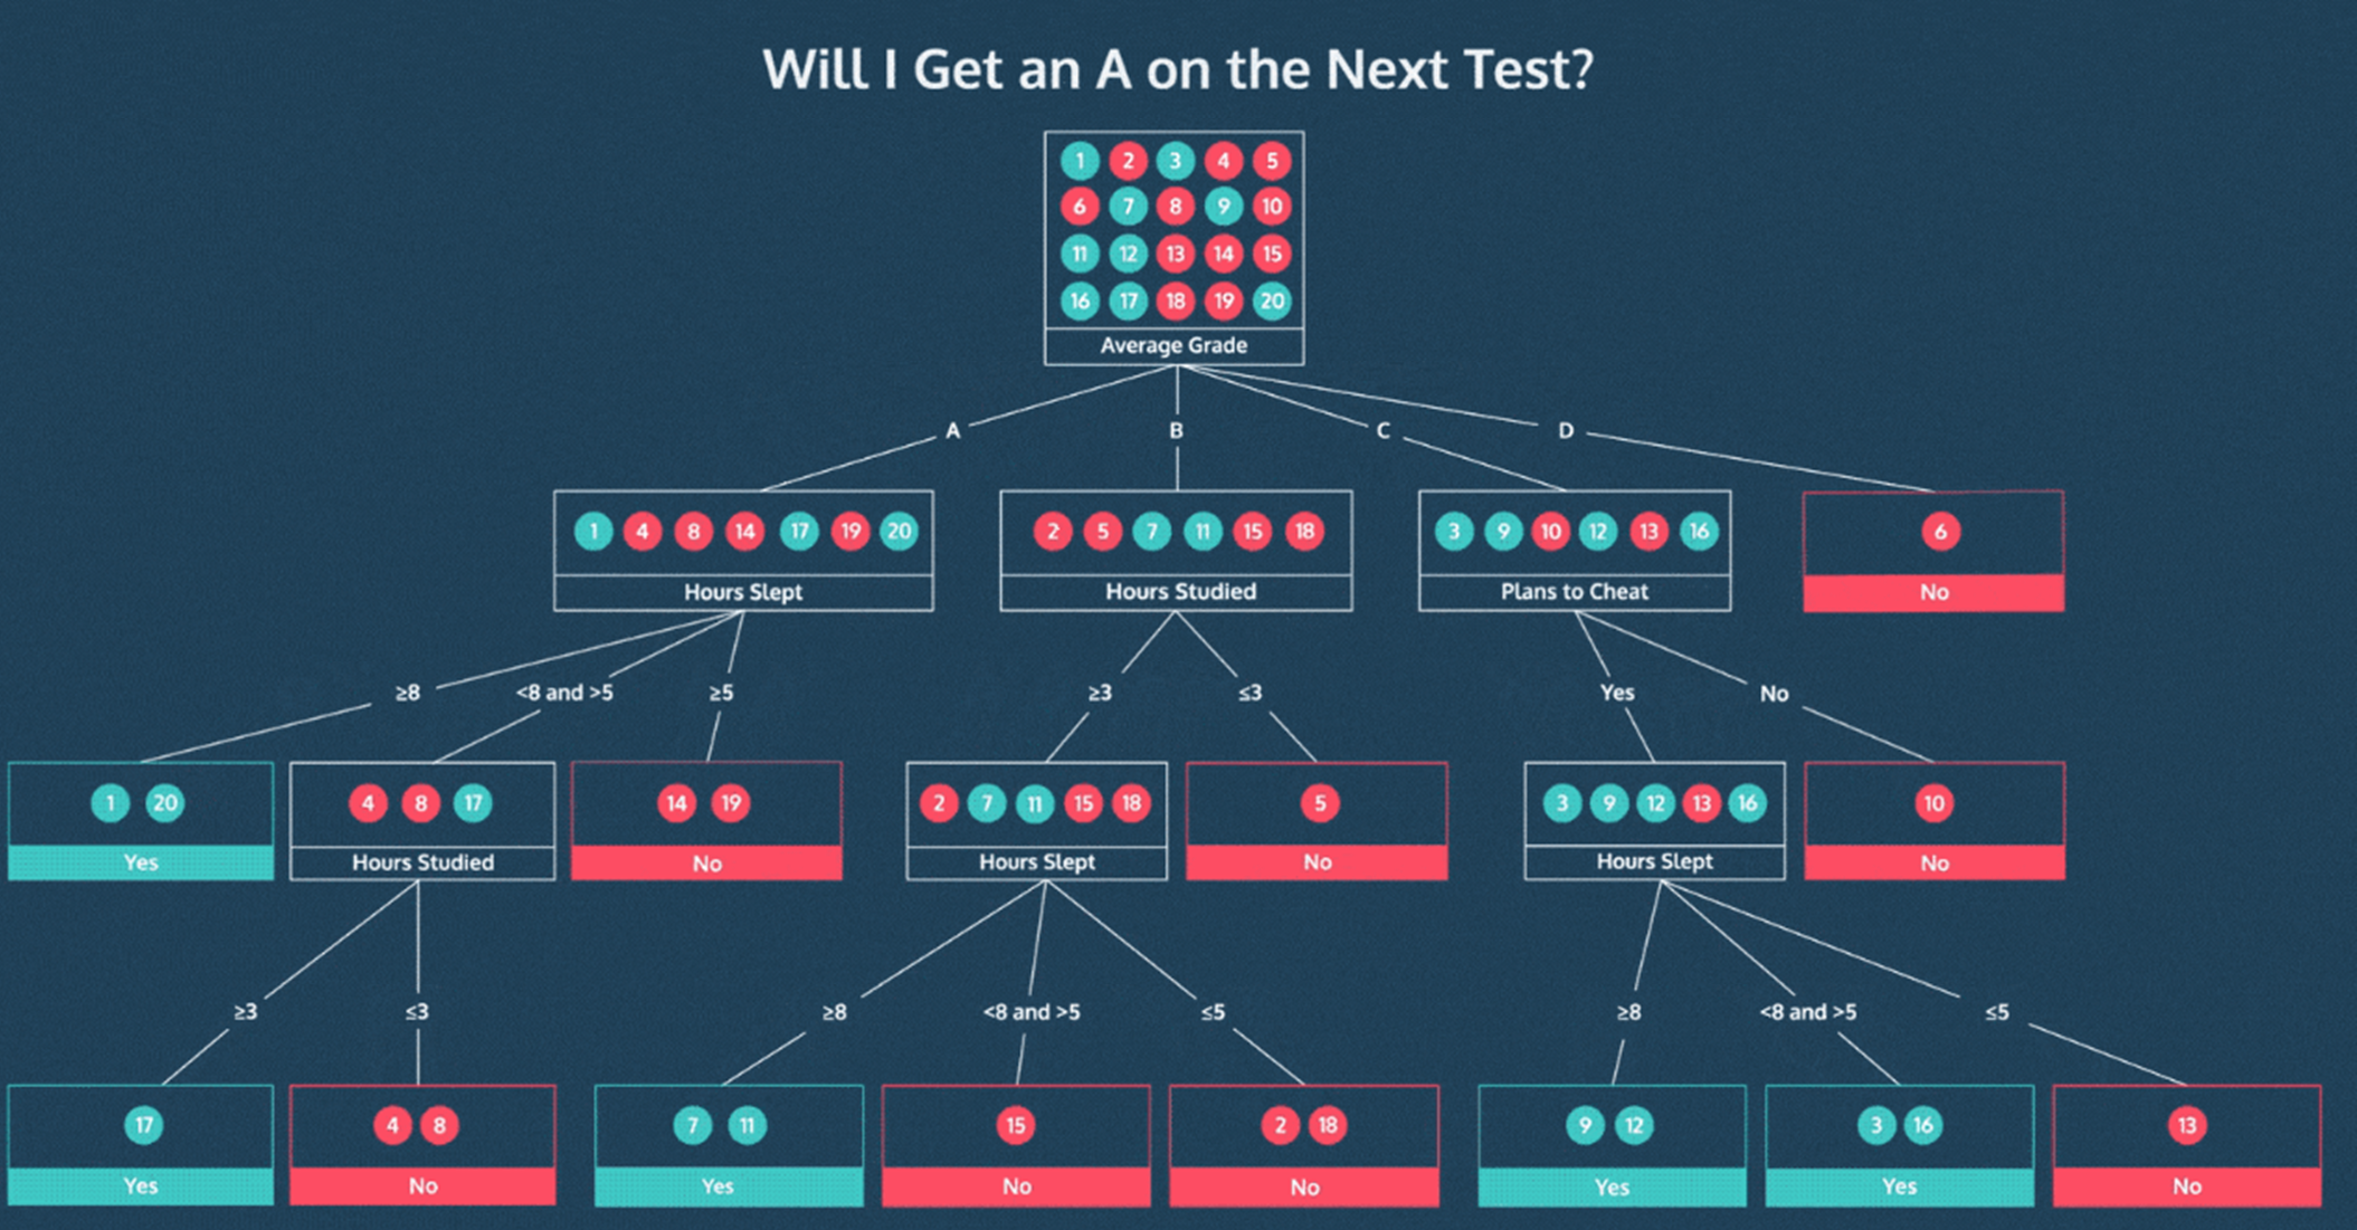

In [5]:
Image("https://hleecaster.com/wp-content/uploads/2020/01/dct01.png")

### - 주요 인자 및 하이퍼파라미터
- 주요 인자
    - 지니 불순도
        - Classification Problem에서 사용 가능한 분할 기준 (Split Criteria) 중 하나
            - 필요한 이유 : 가지를 만드는 의사결정을 하는데 있어서 최적의 분류를 위한 결정을 계속해서 맞이하는데, 이때에 필요
        - 지니 불순도는 클래스 안에 분류가 완벽하게 잘 되어있으면 0. 혼탁하면 max 0.5가 됨.
        - 구슬 10개 중, 파란 구슬이 3개가 있을 때에 지니 불순도 : 
            - 1 - (((3/10)^2) + ((7/10)^2)) = 0.42 -> 42%

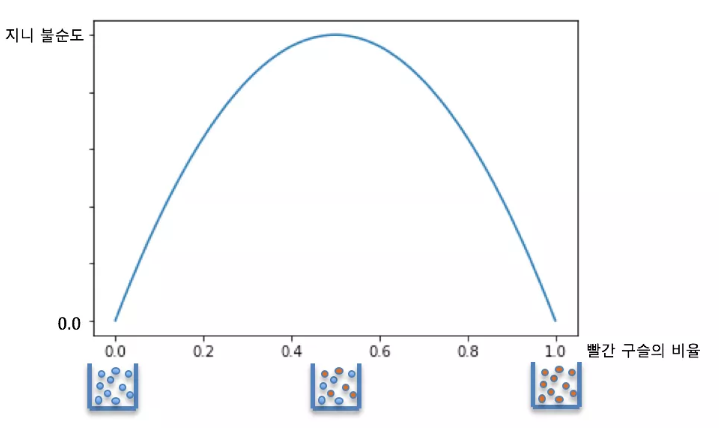

In [20]:
Image("https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FbUgOap%2FbtqAXhS3sTX%2F7u52vxc5ZJ7uFIcHazRA3k%2Fimg.png")
# 그래프는 대칭.

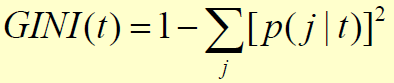

In [21]:
Image("https://lucy-the-marketer.kr/wp-content/uploads/2020/12/gini-index.png")

- 엔트로피 
~= 지니 불순도
    - 데이터 분포의 순수도(또는 불순도)를 나타내는 척도
    - 확률 변수의 불확실성을 수치로 나타낸 것(정보량의 기댓 값)

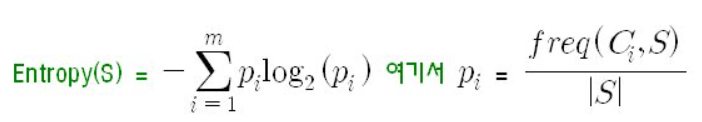

In [15]:
Image("https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FelDB1S%2FbtqYurzUZsM%2FNkz1v7SbDy6Wqk8p1mudBK%2Fimg.png")


S: 주어진 데이터들의 집합, C: 레코드(클래스) 값들의 집합, freq(Ci,S): S에서 Ci에 속하는 레코드의 수, |S|: 주어진 데이터들의 집합의 데이터 개수

- 엔트로피 값 =  레코드 값의 포함 비율에 로그를 적용하고, 다시 가중치로 곱한 값을 모두 더한 것
- 엔트로피 수치의 의미
    - Entropy == 0 : 해당 분류에 속하는 개체의 속성이 모두 동일. 즉, 분류를 하지 않아도 됨
    - Entropy -> 1에 가까움 : 불순도가 높음. 전혀 분리가 안되어 있음
    - Entropy -> 0에 가까움 : 불순도가 낮음. 같은 데이터 결과만 존재
    - 불순도가 높을수록 분류하기 어려움.

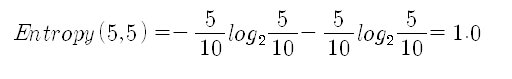

In [14]:
# 예시 : 10명의 회원이 있는데 5명이 우수회원, 5명이 일반회원인 경우
Image("./image/1654B5194A4243AF4B.jpg")

- 지니 불순도와 엔트로피의 차이
    - 둘 다 불순도에 관한 지표.
    - 성능 측면
        - 엔트로피가 지니보다 더 나은 성능을 가짐.
        - 아래의 그림을 보면, 지니의 커브가 엔트로피의 커브보다 경사가 더 급함. -> 극단값을 제외하고서는 엔트로피가 지니보다 평가에 더 가혹하다.
            -> 엔트로피를 기준으로 한 모델은 더 잘 분류 되도록 노력 함
    - 연산 속도 측면
        - 지니가 엔트로피보다 빠름.
        - ∵ 엔트로피는 로그를 사용하기 때문. -> 데이터가 증가할 수록 이러한 경향이 가속화 됨.

    - 결론
        - 지니 : 준수한 성능과 빠른 계산을 원할 때
        - 엔트로피 : 시간이 조금 더 걸리더라도 좋은 성능을 얻고자 할 때.

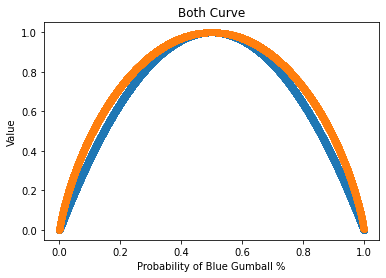

In [16]:
Image("https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2Fk0sn2%2Fbtq3St6dCbz%2FVsG89PDee0YydRioToVY10%2Fimg.png")
# 지니 : 파란색, 엔트로피 : 주황색
# 엔트로피는 1이 혼탁한 값, 지니 불순도는 0.5이 혼탁한 값이지만, 이 그래프에서는 스케일을 맞추어 그림
# 전체 공이 100개고, 파란 공이 20개 일 때, 지니 불순도는 약 0.6을 나타내지만, 엔트로피는 약 0.8을 나타냄

- 정보 이득(Information Gain) (또는 정보 획득량)
    - 상위 노드의 엔트로피 - 하위노드의 엔트로피 
        (또는 상위 노드의 지니 불순도 - 하위노드의 지니 불순도)
    - 어떤 속성을 선택함으로 인해 데이터를 더 잘 구분하게 되는 지에 대한 값
    - 값이 클 수록 정보 이득이 크고, 변별력이 좋다.
    - ex) 
        학생 데이터에서 수능 등급을 구분하는데 있어 수학 점수가 체육 점수보다 변별력이 더 높다고 하면,
        수학 점수 속성이 체육 점수 속성 보다 정보이득이 높다.

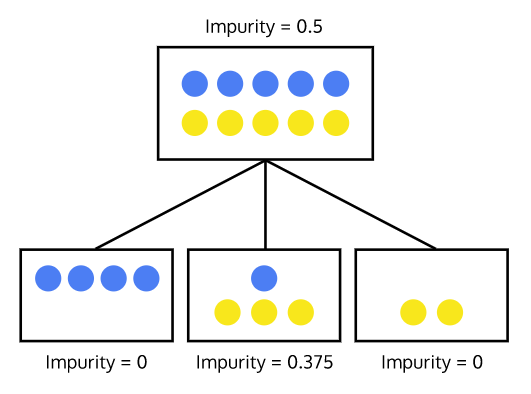

In [12]:
Image("https://hleecaster.com/wp-content/uploads/2020/01/dt04.png")

위처럼 불순도 0.5의 데이터 세트를 불순도 각각 0, 0.375, 0을 가진 3개의 데이터 세트로 분할했을 때, 여기서 얻은 정보 획득량은

Information Gain = 0.5 – (0 + 0.375 + 0) = 0.125 -> 그냥 이전 단계 불순도에서 다음 단계의 불순도 합을 빼주는 것.

-> 분할 된 데이터 세트들의 불순도가 작을수록 정보 획득량은 증가

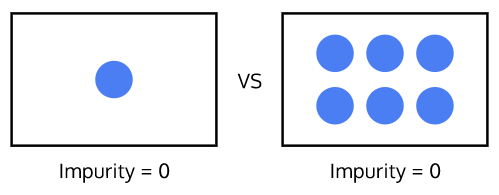

In [22]:
Image("https://hleecaster.com/wp-content/uploads/2020/01/dt05.png")

위의 그림과 같이 같은 불순도 0이지만, 오른쪽 데이터 세트가 더 의미 있음.
-> 이로 인해 가중치를 적용한 정보 이득을 만듬.

- Weighted Information Gain (가중치 정보 이득)
    - 분할하기 전의 데이터에 비해 분할 후 생성된 데이터의 비율에 따라 가중치를 구해놓고, 이를 불순도에 곱해서 정보 획득량을 구함
        -> 데이터 세트의 크기가 작을 수록 그 불순도의 영향력도 작아짐.

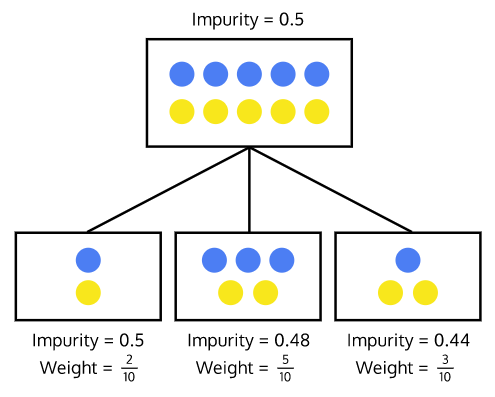

In [23]:
Image("https://hleecaster.com/wp-content/uploads/2020/01/dt06.png")

- 하이퍼파라미터
    - criterion : 노드 분리기준. 
        -> '지니 불순도'와 '엔트로피'를 사용
    - splitter : 노드 분리 방법.
        -> 'random', 'best'를 사용
    - max_depth : 트리 모형의 최대 깊이
        -> 값이 커질수록 깊어져 과적합(overfitting)이 쉽게 일어남
    - min_samples_split : 중간노드에서 분리가 일어나기 위한 샘플의 수 
    - min_samples_leaf : leaf 노드에서 필요한 최소한의 샘플 수
        -> 너무 적으면 과적합이 일어날 수 있음
    - max_features : 노드를 분리할 때 고려하는 속성의 수
        -> 'int', 'float', 'auto', 'sqrt', 'log2', None 값이 들어가며 각 다른 방식으로 계산해 속성의 수를 고려.
    - random_state : random_state를 고정하면 값 변화를 살펴보고 모델의 성능 개선에 대한 판단을 내릴 수 있음

### 모델 학습

- 재귀적 분기
    - 의사결정 트리는 앞서 확인한 정보 획득량을 바탕으로 질문을 만들어 나감.
        -> 정보 획득량이 큰 순서대로 질문을 배치하는 것이 중요. (스무고개를 할 때도 중요한 질문을 먼저 하는 것이 좋은 것 처럼)
    - 그리고 그 속성에 대해 어느 기준으로 나누는것이 좋을지 반복적으로 적용해부면서 최적의 트리를 찾게 됨
        -> 이를 재귀 알고리즘이라고 함
        -> 이렇게 반복하면서 더이상 정보 획득량이 없을 때 재귀를 중단하게 됨.

    1회 분기를 위해 계산해야 하는 경우의 수
        - 개체가 n개, 변수가 d개라고 할 경우.
        - 경우의 수 : d(n-1)

- 가지치기
    - 모든 종단 노드의 순도가 100%인 상태를 Full tree라고 함.
    - 그런데, Full tree는 분기가 너무 많아서 overfitting할 염려가 생길 수 있기 때문에(일반화 능력이 떨어짐), 가지치기가 필요함.
        - 의사결정 나무의 분기 수가 증가 할 때, 처음에는 새로운 데이터에 대한 오분류율이 감소하다가 일정 수준 이상이 되면 오분류율이 되려 증가 하는 현상이 발생한다고 함.
    - 가지치기의 비용 함수(cost function)
        - 비용 함수를 최소로 하는 분기를 찾아내도록 학습.
        CC(T) = Err(T) + a * L(T)
            - CC(T) : 의사 결정나무의 비용 복잡도(=오류가 적으면서 종단 노드의 수가 적은 단순한 모델일 수록 작은 값)
            - Err(T) : 검증데이터에 대한 오분류율
            - L(T) : 종단 노드의 수(구조의 복잡도)
            - a = Err(T)와 L(T)를 결합하는 가중치(사용자에 의해 부여 됨. 보통 0.01~0.1의 값을 사용.)

### 사용 방법

In [ ]:
from sklearn.tree import DecisionTreeClassifier

#classifier 선언
classifier = DecisionTreeClassifier() 

#fit() 메서드를 사용해 학습 데이터를 기반으로 트리 생성
classifier.fit(training_points, training_labels)

# 새로운 테스트 데이터로 예측
predictions = classifier.predict(test_data)

# 트리의 최대 크기를 지정
DecisionTreeClassifier(max_depth = n)

# 미리 테스트 세트를 나눠 놓았을 경우, 분류 정확도를 확인
print(classifier.score(test_data, test_labels))

### 한계

- 트리를 빌딩, 생성하는 방식에서의 한계
    - 지금 상황에서 어떤 속성을 가지고 분할해야 정보 획득량이 가장 클 것인지 확인해서, 그 속성에 따라 데이터를 분할. -> 데이터를 먼저 이렇게 나누었을 때 나타날 파급 효과를 고려하지 않음
        -> 그 순간만 보면 최선의 분할이 아니지만, 이어서 나타나는 속성들에서 더 나은 분할을 발견하여 결과적으로 더 좋은 트리를 만들 수도 있는데, 순간의 선택 때문에 그 가능성을 배제 해버림
        -> 이런 방법을 greedy(탐욕 알고리즘)라고 부름.

- overfitting 문제
    - 트리의 구조가 훈련 데이터에 매우 의존적이라 현실의 데이터를 정확하게 나타내지 못함.
        -> 일반적으로 나무가 커질수록 학습 데이터에 알맞게 만들어져 현실 데이터로의 일반화하기 어려워지는 경향이 있음
        -> 이를 위해 가지치기를 해야 함.

## 2. 랜덤포레스트

- 랜덤포레스트의 원리
- 주요 인자 및 하이퍼파라미터
    - Bagging(배깅)
    - 트리 개수
    - 속성 개수
- 사용 방법


### 랜덤포레스트의 원리

- 의사결정 나무의 한계점을 극복하기 위한 방법
    - 훈련을 통해 구성해 놓은 다수의 나무들로부터 분류 결과를 취합해서 결론을 얻는 일종의 인기투표 방식
    -> 몇몇의 나무들이 오버피팅을 보일 수는 있으나, 다수의 나무를 기반으로 예측하기에 그 영향력이 줄어듬
        -> 이렇게 좋은 성능을 얻기 위해 다수의 학습 알고리즘을 사용하는것 : 앙상블 학습섭
    
### 주요 인자 및 하이퍼파라미터
- 주요인자
    - Bagging(배깅)
        - 총 n개의 학습데이터에서 임의로 m개씩 행을 선택해서 의사결정 트리를 만든는 것.
        -> 중복 허용

- 하이퍼파라미터
    - n_estimators : 랜덤 포레스트 안의 결정 트리 개수
        -> 클수록 좋음. 결정 트리가 많을 수록 Decision boundary가 더 깔끔함 -> 그만큼 메모리와 훈련시간 증가
    - min_samples_split : 노드를 분할하기 위한 최소한의 샘플 데이터
        -> 과적합을 제어하는데 사용
        -> Default = 2 . 작게 설정할 수록 분할 노드가 많아져 과적합 가능성 증가
    - min_samples_leaf : 리프노드가 되기 위해 필요한 최소한의 샘플 데이터수
        -> min_samples_split과 함께 과적합 제어 용도
        -> 불균형 데이터의 경우 특정 클래스의 데이터가 극도로 작을 수 있으므로 작게 설정 필요
    - max_features : 트리를 만들 때 사용될 속들을 제한함으로써 각 나무들에 다양성을 줘야 함.
        -> ex) 총 25개의 속성이 있는데, 그 중 5개의 속성만 뽑아서 살펴본 후 그 중 정보 획득량이 가장 높은걸 기준으로 데이터를 분할.
            -> 그 다음 단계에서도 다시 임의로 5개만 선택해서 살펴보고를 반복
        -> 속성 개수 선택은 전체 속성개수의 제곱근 만큼 선택하는 것이 경험적으로 좋다고 함.
            -> ex) 총 25개면 5개
    - max_depth : 트리의 최대 깊이
        -> default = None -> 완벽하게 클래스 값이 결정될 때 까지 분할 또는 데이터 개수가 min_samples_split보다 작아질 때까지 분할
        -> 깊이가 깊어지면 과적합될 수 있으므로 적절히 제어 필요
    - max_leaf_nodes : 리프노드의 최대 개수


In [ ]:
Image("https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FbHJ2u4%2Fbtqw2kmJhgO%2FW89tIKkvKNuUa9islCuTU1%2Fimg.png")
# 랜덤포레스트를 시각화 한 것

### 사용 방법

In [ ]:
from sklearn.ensemble import RandomForestClassifier

#의사결정나무와 거의 똑같음. max_features를 지정하지 않을 경우, 기본 세팅은 n제곱근 개수 만큼
classifier = RandomForestClassifier(n_estimators = 100)

### 출처
- 의사결정 나무
    - https://hleecaster.com/ml-decision-tree-concept/
    - https://data-science-hi.tistory.com/59
    - https://wikidocs.net/42220
    - https://ratsgo.github.io/machine%20learning/2017/03/26/tree/

- 지니 불순도 & 엔트로피
    - https://danbi-ncsoft.github.io/study/2018/12/06/entropy.html
    - https://yongku.tistory.com/entry/%EC%97%94%ED%8A%B8%EB%A1%9C%ED%94%BCEntropy-%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D-%ED%86%B5%EA%B3%84-%EC%9D%98%EC%82%AC%EA%B2%B0%EC%A0%95%EB%82%98%EB%AC%B4Decision-Tree
    - https://computer-science-student.tistory.com/60
    - https://wyatt37.tistory.com/9#:~:text=%EB%B3%B4%ED%86%B5%EC%9D%98%20%EA%B2%BD%EC%9A%B0%20%EC%A7%80%EB%8B%88%EB%B3%B4%EB%8B%A4,%EC%84%B1%EB%8A%A5%EC%9D%84%20%EB%82%B8%EB%8B%A4%EA%B3%A0%20%EC%95%8C%EB%A0%A4%EC%A0%B8%20%EC%9E%88%EC%8A%B5%EB%8B%88%EB%8B%A4.&text=%EC%A6%89%2C%20%EA%B7%B9%EB%8B%A8%EA%B0%92%EC%9D%84%20%EC%A0%9C%EC%99%B8,%EC%9E%98%20%EB%B6%84%EB%A5%98%ED%95%98%EB%8F%84%EB%A1%9D%20%EB%85%B8%EB%A0%A5%ED%95%A9%EB%8B%88%EB%8B%A4.
    
- 정보 이득
    - https://eehoeskrap.tistory.com/13#:~:text=%EC%A0%95%EB%B3%B4%EC%9D%B4%EB%93%9D%EC%9D%B4%EB%9E%80%20%EC%96%B4%EB%96%A4%20%EC%86%8D%EC%84%B1,%EC%9D%B4%20%EB%86%92%EB%8B%A4%EA%B3%A0%20%EB%A7%90%ED%95%A0%20%EC%88%98%20%EC%9E%88%EB%8B%A4.


    

- 앙상블 학슴
    - https://bkshin.tistory.com/entry/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D-11-%EC%95%99%EC%83%81%EB%B8%94-%ED%95%99%EC%8A%B5-Ensemble-Learning-%EB%B0%B0%EA%B9%85Bagging%EA%B3%BC-%EB%B6%80%EC%8A%A4%ED%8C%85Boosting

- 랜덤 포레스트
    - https://hleecaster.com/ml-random-forest-concept/
    - https://eunsukimme.github.io/ml/2019/11/26/Random-Forest/
